# Loneliness index and health and disability deprivation exploration

In [1]:
import pandas as pd

In [36]:
loneliness_imd = pd.read_csv('england/loneliness_imd.csv')
loneliness_imd.drop(6270, inplace=True)
imd = pd.read_csv('england/imd2015eng.csv')
full_loneliness = pd.read_csv('england/final_data.csv')

In [9]:
for c in list(loneliness_imd.columns):
    print(c)

lsoa11
year
loneills
lsoa_code
lsoa_name
district_code
district_name
imd_score
imd_rank
imd_decile
income_score
income_rank
income_decile
employment_rate
employment_score
employment_decile
education_score
education_rank
education_decile
health_score
health_rank
health_decile
crime_score
crime_rank
crime_decile
housing_score
housing_rank
housing_decile
living_score
living_rank
living_decile
poor_children_score
poor_children_rank
poor_children_decile
poor_older_score
poor_older_rank
poor_older_decile
young_sub_score
young_sub_rank
young_sub_decile
adult_skills_sub_score
adult_skills_sub_rank
adult_skills_sub_decile
geog_barriers_sub_score
geog_barriers_sub_rank
geog_barriers_sub_decile
wider_barriers_sub_score
wider_barriers_sub_rank
wider_barriers_sub_decile
indoor_sub_score
indoor_sub_rank
indoor_sub_decile
outdoor_sub_score
outdoor_sub_rank
outdoor_sub_decile
total_population
aged_under_15_population
aged_16-59_population
aged_over_60_population
working_age_population


In [37]:
desired_columns = [
    'lsoa11', 'year', 'lsoa_code', 'lsoa_name', 'district_code', 'district_name',
    'loneills',
    'imd_score', 'imd_rank', 'imd_decile',
    'health_score', 'health_rank', 'health_decile',
    'aged_under_15_population', 'aged_16-59_population', 'aged_over_60_population', 'total_population'
]

loneliness_health = loneliness_imd.filter(desired_columns, axis=1)
print(loneliness_health.shape)

(6270, 17)


## Health score and loneliness index

In [14]:
import plotly.express as px

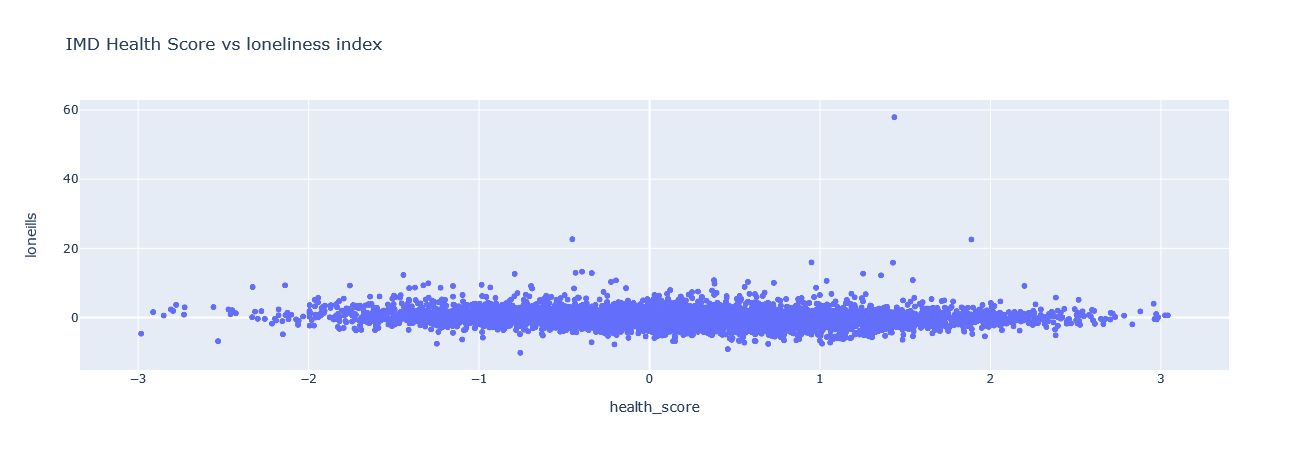

In [41]:
fig = px.scatter(loneliness_health, y='loneills', x='health_score', title='IMD Health Score vs loneliness index')
fig.show()

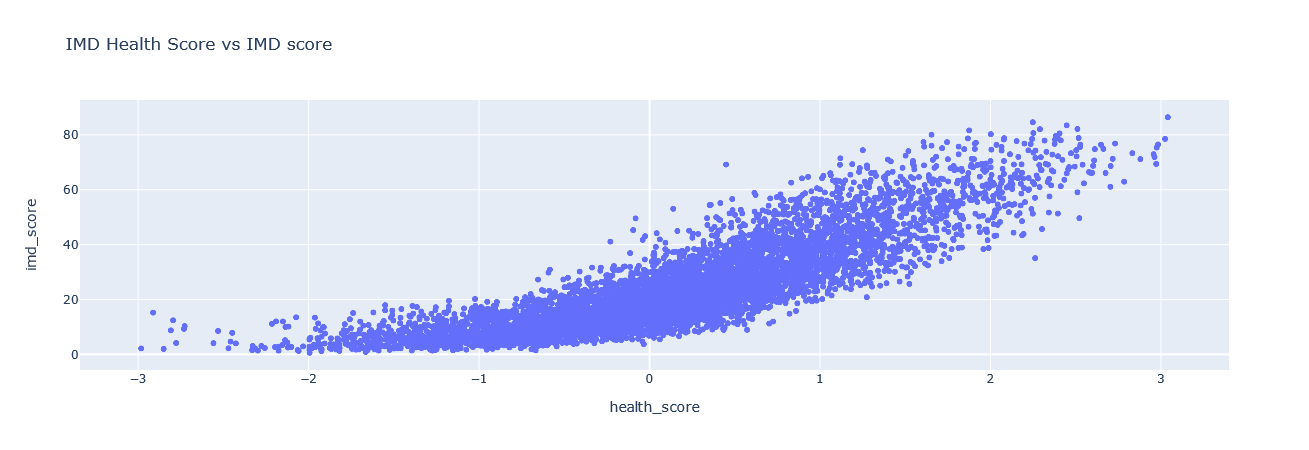

In [40]:
fig = px.scatter(loneliness_health, y='imd_score', x='health_score', title='IMD Health Score vs IMD score')
fig.show()

In [27]:
loneliness_health[['imd_score', 'health_score', 'loneills']].corr()

,imd_score,health_score,loneills
imd_score,1.000000,0.856076,-0.173878
health_score,0.856076,1.000000,-0.133275
loneills,-0.173878,-0.133275,1.000000


So the health deprivation score doesn't appear strongly correlated with loneliness but there's a fairly strong correlation between health and overall IMD score (unsurprising given IMD score is 13.5% of the IMD score).

This doesn't match the ONS findings based on data collected for the Community Life Survey (CLS) between August 2016 and March 2017: "People in poor health or who have conditions they describe as “limiting” were also at particular risk of feeling lonely more often." - https://www.ons.gov.uk/peoplepopulationandcommunity/wellbeing/articles/lonelinesswhatcharacteristicsandcircumstancesareassociatedwithfeelinglonely/2018-04-10

## Health and loneliness deciles

Maybe the raw scores are too varied to show much relationship but perhaps there's a tendancy for worse health scores to the related to worse loneliness scores

In [57]:
loneliness_health['loneills_decile'] = pd.qcut(loneliness_health['loneills'], 10, labels=False)+1.0

In [58]:
loneliness_health[['loneills_decile', 'health_decile']]

,loneills_decile,health_decile
0,1.0,4.0
1,1.0,3.0
2,3.0,5.0
3,2.0,6.0
4,4.0,2.0
...,...,...
6265,4.0,5.0
6266,4.0,1.0
6267,2.0,1.0
6268,9.0,1.0


In [97]:
decile_counts = loneliness_health.value_counts(subset=['loneills_decile', 'health_decile'])
decile_counts = pd.DataFrame(decile_counts.values, index=decile_counts.index, columns=['count'])
decile_counts.reset_index(inplace=True)
decile_counts = decile_counts.pivot(index='loneills_decile', columns='health_decile', values='count')

In [98]:
decile_counts

health_decile,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0
loneills_decile,,,,,,,,,,
1.0,102,111,112,72,58,50,42,29,25,26
2.0,91,97,95,55,74,48,56,35,44,32
3.0,81,83,82,61,68,77,59,44,47,25
4.0,93,79,76,67,68,58,66,53,25,42
5.0,91,58,83,73,82,55,51,53,47,34
6.0,98,65,83,61,82,56,50,49,41,42
7.0,76,56,57,65,66,65,60,69,62,51
8.0,93,55,60,65,76,54,58,57,59,50
9.0,77,61,65,54,50,57,54,63,74,72


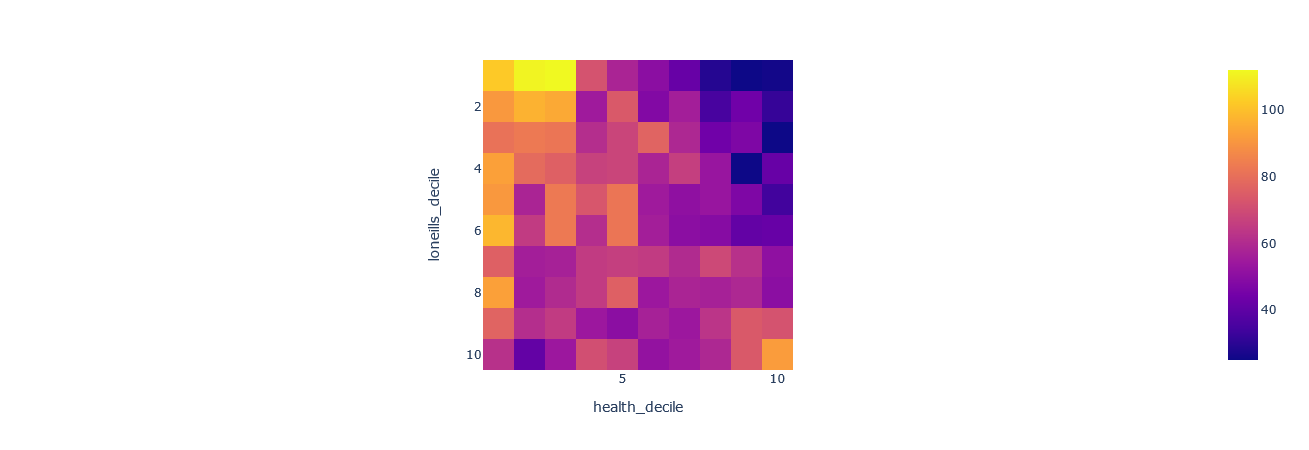

In [99]:
fig = px.imshow(decile_counts)
fig.show()

## Simple linear models: loneills score from IMD domain scores

In [55]:
import sklearn
from sklearn import linear_model

In [101]:
reg = linear_model.LinearRegression()

X = loneliness_imd[['income_score', 'employment_score', 'education_score', 'health_score', 'crime_score', 'housing_score', 'living_score', 'poor_children_score', 'poor_older_score']]
y = loneliness_imd['loneills']

reg.fit(X, y)

reg.score(X, y)

0.0806287152311157

In [100]:
reg = linear_model.LinearRegression()

X = loneliness_imd[['income_score', 'employment_score', 'education_score', 'crime_score', 'housing_score', 'living_score', 'poor_children_score', 'poor_older_score']]
y = loneliness_imd['loneills']

reg.fit(X, y)

reg.score(X, y)

0.07305214368835711

So health score definitely helps with the fit but neither are great.